In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    stock = yf.Ticker(stock_symbol)
    stock_data = stock.history(start=start_date, end=end_date)
    return stock_data

def detect_bollinger_breakout(stock_data, ma_period=20, std_dev_multiplier=2, volume_multiplier=1.5):
    # Calculate moving average (MA)
    stock_data['MA'] = stock_data['Close'].rolling(window=ma_period).mean()

    # Calculate standard deviation over the same period
    stock_data['STD'] = stock_data['Close'].rolling(window=ma_period).std()

    # Calculate upper and lower Bollinger Bands
    stock_data['Upper Band'] = stock_data['MA'] + (stock_data['STD'] * std_dev_multiplier)
    stock_data['Lower Band'] = stock_data['MA'] - (stock_data['STD'] * std_dev_multiplier)

    # Volume breakout: Check if current volume is higher than a multiple of the rolling average volume
    stock_data['Avg Volume'] = stock_data['Volume'].rolling(window=ma_period).mean()
    stock_data['Volume Breakout'] = stock_data['Volume'] >= stock_data['Avg Volume'] * volume_multiplier

    # Define breakouts: Close above upper band or below lower band, confirmed by volume breakout
    price_breakout_condition = (
        (stock_data['Close'] >= stock_data['Upper Band']) | (stock_data['Close'] <= stock_data['Lower Band'])
    )
    volume_breakout_condition = (
        (stock_data['Volume Breakout'])
    )
    
    
    # Identify breakout dates
    price_breakout_dates = stock_data[price_breakout_condition].index
    volume_breakout_dates = stock_data[volume_breakout_condition].index

    return price_breakout_dates, volume_breakout_dates, stock_data

In [3]:
def plot_stock_with_bollinger(stock_data, price_breakout_dates, volume_breakout_dates):
    plt.figure(figsize=(35, 10))
    
    # Plot stock price, Bollinger Bands, and moving average
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.plot(stock_data.index, stock_data['MA'], label='20 Days Moving Average', linestyle='--')
    plt.plot(stock_data.index, stock_data['Upper Band'], label='Upper Bollinger Band', linestyle='--', color='red')
    plt.plot(stock_data.index, stock_data['Lower Band'], label='Lower Bollinger Band', linestyle='--', color='green')
    
    # Plot price breakout points as scatter points
    plt.scatter(price_breakout_dates, stock_data.loc[price_breakout_dates]['Close'], color='black', label='Price Breakout', s=100, zorder=5)
    
    # Plot volume breakout points as scatter points
    plt.scatter(volume_breakout_dates, stock_data.loc[volume_breakout_dates]['Close'], color='grey', label='Volume Breakout', s=100, zorder=5)

    plt.title('Stock Price with Bollinger Bands and Breakout Points')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(prop={'size': 15})
    plt.show()


def plot_stock_with_bollinger_plotly(stock_data, price_breakout_dates, volume_breakout_dates):
    # Create plotly figure
    fig = go.Figure()

    # Add stock price line
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'))

    # Add moving average line
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA'], mode='lines', name='Moving Average', line=dict(dash='dash')))

    # Add Bollinger Bands
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper Band'], mode='lines', name='Upper Bollinger Band', line=dict(color='red', dash='dash')))
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Lower Band'], mode='lines', name='Lower Bollinger Band', line=dict(color='green', dash='dash')))

    # Add breakout markers
    fig.add_trace(go.Scatter(x=price_breakout_dates, y=stock_data.loc[price_breakout_dates]['Close'], mode='markers', name='Price Breakout', marker=dict(color='black', size=10, symbol='x')))
    fig.add_trace(go.Scatter(x=volume_breakout_dates, y=stock_data.loc[volume_breakout_dates]['Close'], mode='markers', name='Volume Breakout', marker=dict(color='grey', size=10, symbol='x')))

    # Customize layout
    fig.update_layout(
        title='Stock Price with Bollinger Bands and Breakout Periods',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x unified',
        xaxis_rangeslider_visible=True
    )

    # Show interactive plot
    fig.show()

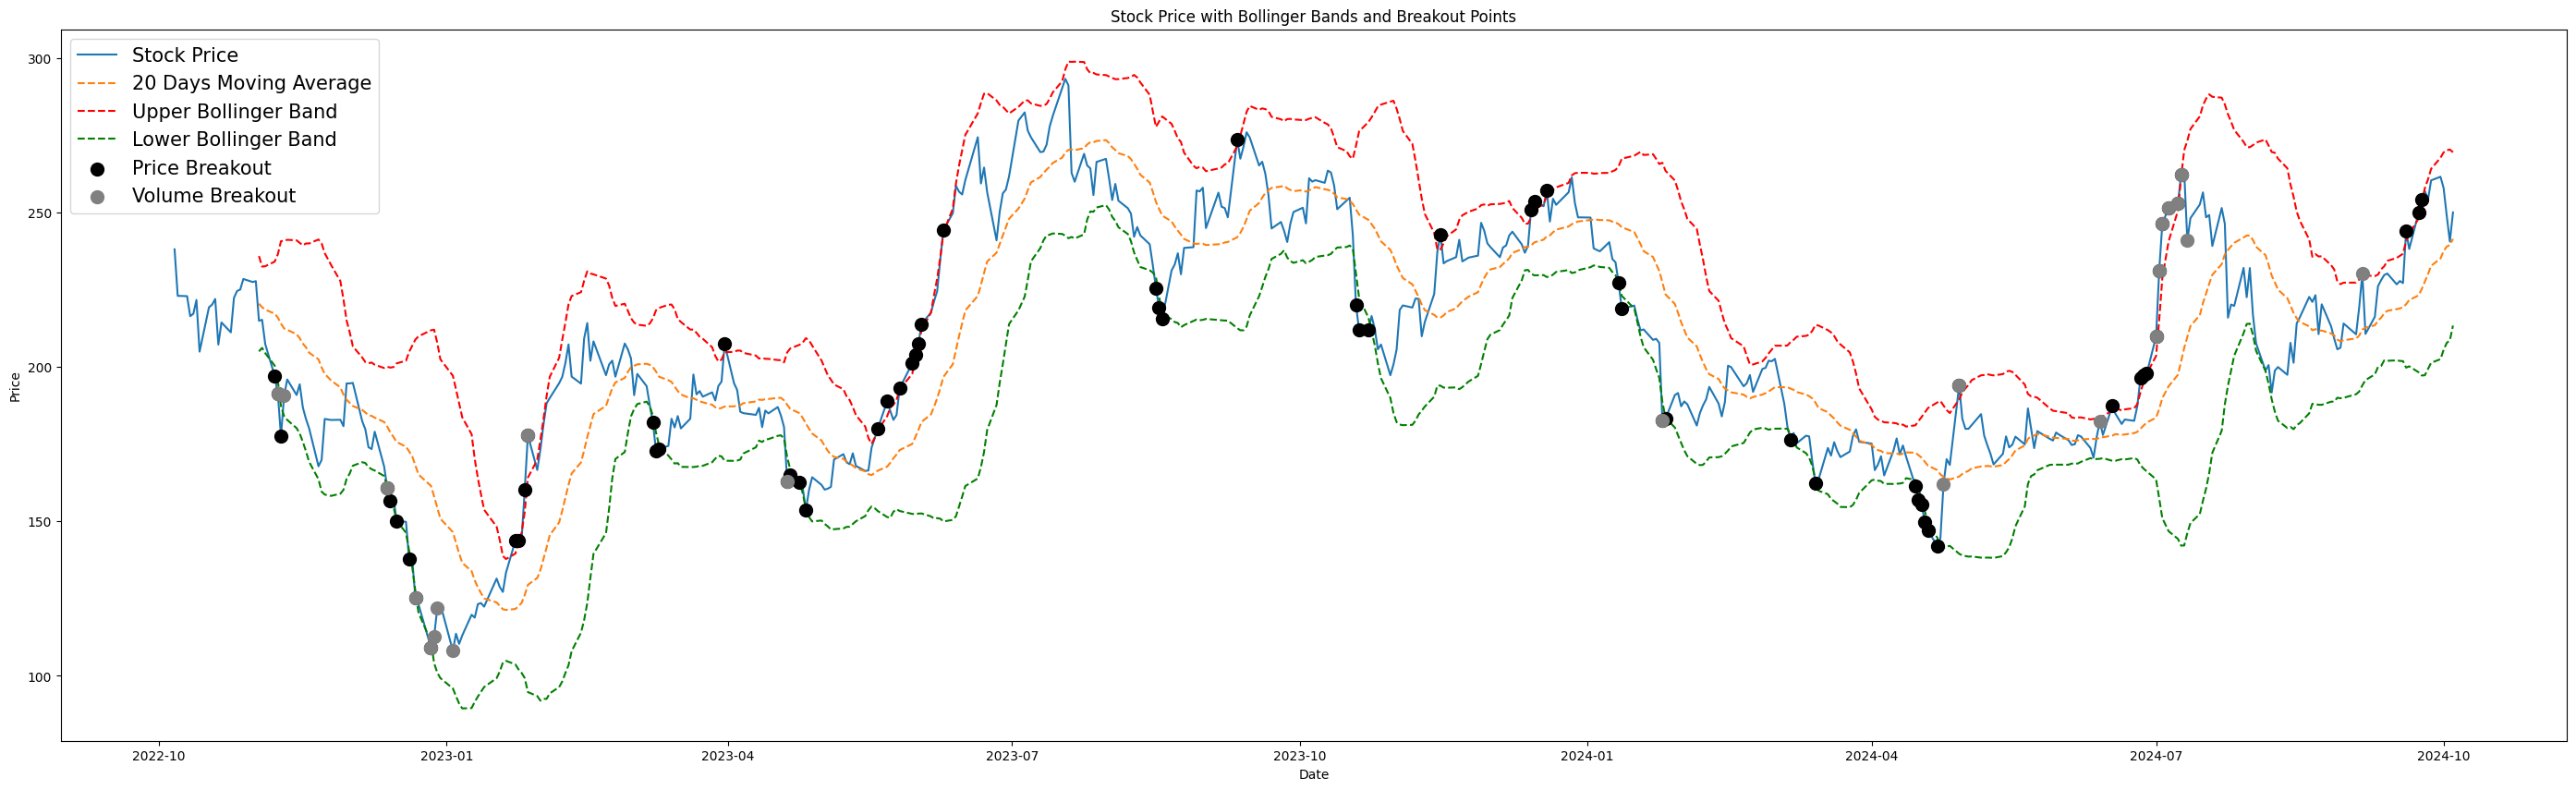

In [4]:
# Example usage:
stock_ticker = 'TSLA'
start_date = pd.Timestamp.now() - pd.DateOffset(years=2)
end_date = pd.Timestamp.now()

# Fetch and plot stock data
stock_data = get_stock_data(stock_ticker, start_date, end_date)
price_breakout_dates, volume_breakout_dates, stock_data = detect_bollinger_breakout(stock_data)
plot_stock_with_bollinger(stock_data, price_breakout_dates, volume_breakout_dates)
plot_stock_with_bollinger_plotly(stock_data, price_breakout_dates, volume_breakout_dates)